In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv('/Users/karanbhutani/Downloads/heart.csv')

In [4]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
data.shape

(918, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
data.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [9]:
data.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [10]:
data.HeartDisease.unique()

array([0, 1])

In [11]:
data.skew()

Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610086
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         1.022872
HeartDisease   -0.215086
dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='count'>

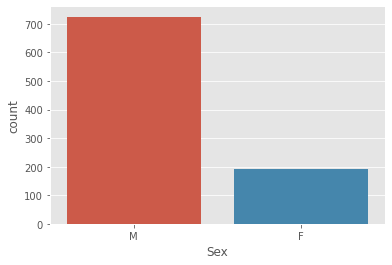

In [12]:
sns.countplot(x="Sex",data=data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

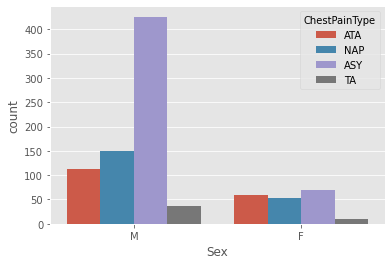

In [13]:
sns.countplot(x="Sex", hue="ChestPainType", data=data )

<AxesSubplot:ylabel='Frequency'>

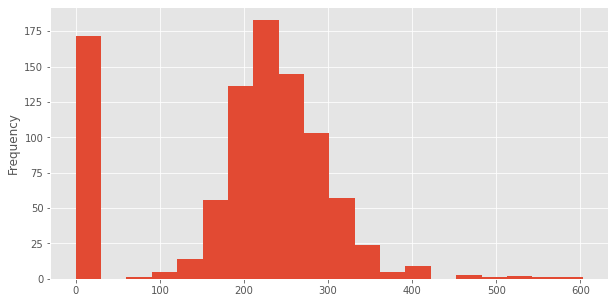

In [14]:
data["Cholesterol"].plot.hist(bins=20, figsize=(10,5))

<AxesSubplot:xlabel='HeartDisease', ylabel='Cholesterol'>

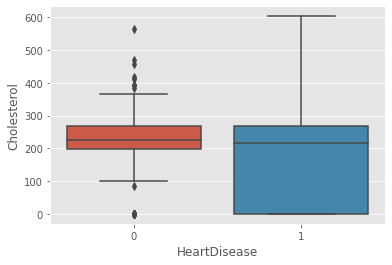

In [15]:
sns.boxplot(y="Cholesterol", x="HeartDisease", data=data)

<AxesSubplot:xlabel='FastingBS', ylabel='HeartDisease'>

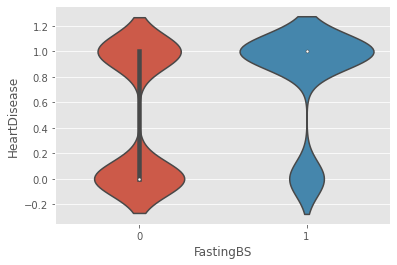

In [16]:
sns.violinplot( x = data["FastingBS"], y= data["HeartDisease"])

In [17]:
data.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

<AxesSubplot:>

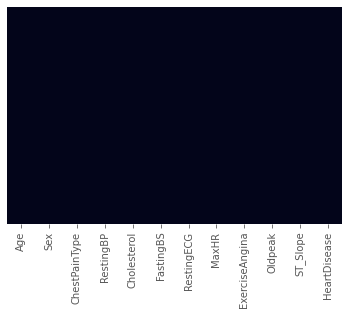

In [18]:
sns.heatmap(data.isnull(),cbar=False ,yticklabels=False)

<AxesSubplot:xlabel='ST_Slope', ylabel='count'>

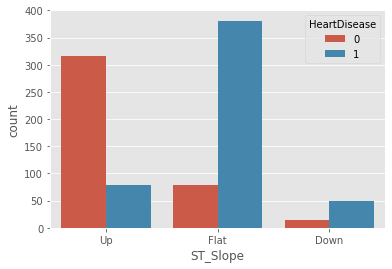

In [19]:
sns.countplot(x="ST_Slope", hue="HeartDisease", data=data)

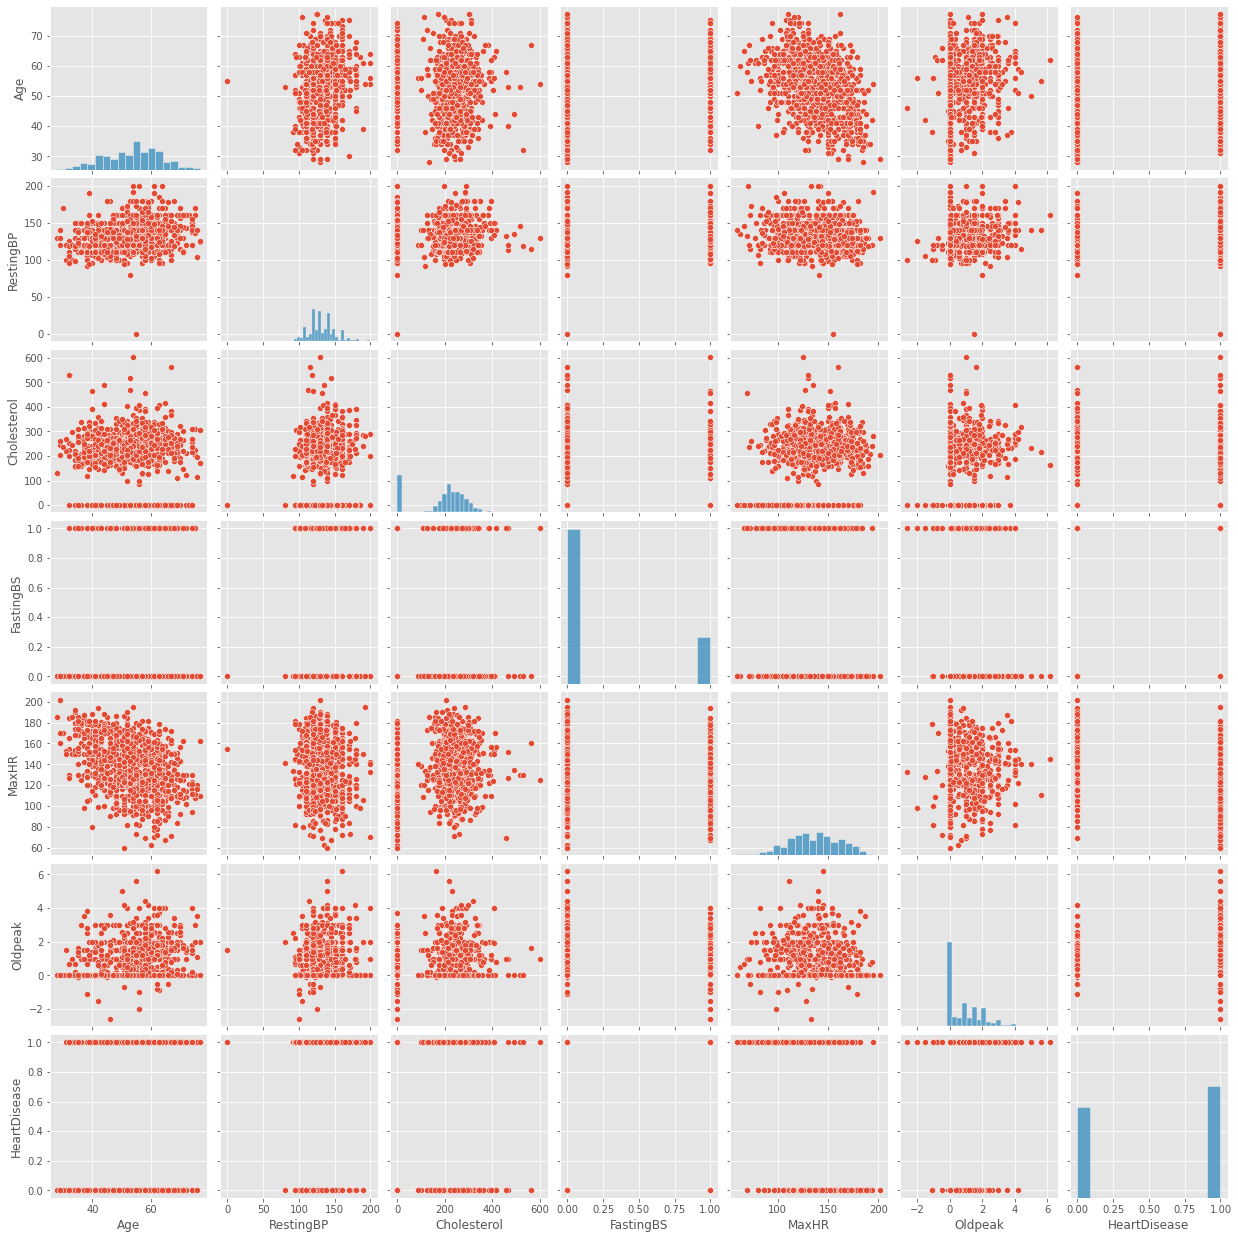

In [20]:
sns.pairplot(data)

<AxesSubplot:xlabel='Age', ylabel='count'>

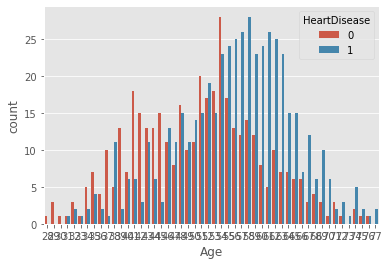

In [21]:
sns.countplot(x="Age", hue="HeartDisease", data=data,)

<AxesSubplot:xlabel='Age', ylabel='Cholesterol'>

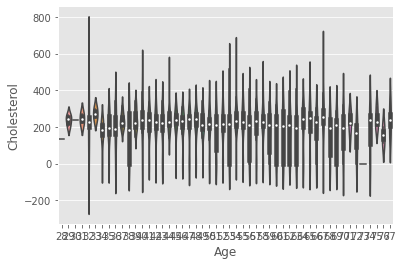

In [22]:
sns.violinplot( x = data["Age"], y= data["Cholesterol"])

<AxesSubplot:xlabel='RestingECG', ylabel='count'>

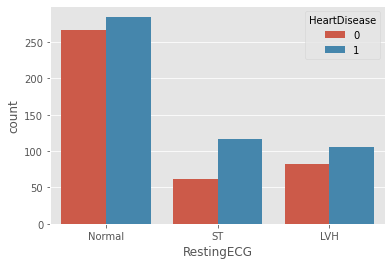

In [23]:
sns.countplot(x="RestingECG", hue="HeartDisease", data=data )

<AxesSubplot:xlabel='MaxHR', ylabel='count'>

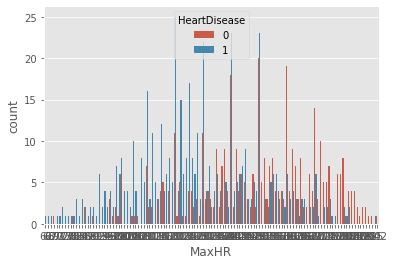

In [24]:
sns.countplot(x="MaxHR", hue="HeartDisease", data=data )

In [25]:
data.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [26]:
cpt = pd.get_dummies(data['ChestPainType'],drop_first=True)

In [27]:
cpt.head(2)

,ATA,NAP,TA
0,1,0,0
1,0,1,0


In [28]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
sex.head(2)

,M
0,1
1,0


In [29]:
ecg = pd.get_dummies(data['RestingECG'],drop_first=True)
ecg.head(10)

,Normal,ST
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [30]:
exang= pd.get_dummies(data['ExerciseAngina'],drop_first=True)
exang.head(10)

,Y
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,0
8,1
9,0


In [31]:
stslope= pd.get_dummies(data['ST_Slope'],drop_first=True)
stslope.head(10)

,Flat,Up
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,0,1


In [32]:
data = pd.concat([data,sex,ecg,exang,stslope],axis=1)

In [33]:
data.head(4)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,M,Normal,ST,Y,Flat,Up
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,1,0,0,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,1,0,0,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1,0,1,0,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,1,0,1,1,0


In [34]:
data.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],axis=1, inplace=True)

In [35]:
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,M,Normal,ST,Y,Flat,Up
0,40,140,289,0,172,0.0,0,1,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,1,0,0,0,1


In [36]:
x = data.drop("HeartDisease",axis=1)
y = data["HeartDisease"]

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logmodel = LogisticRegression()

In [41]:
logmodel

LogisticRegression()

In [42]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [43]:
prediction = logmodel.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(y_test, prediction)*100

86.59420289855072

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
clf = RandomForestClassifier(n_estimators = 100)

In [55]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
y_pred= clf.predict(X_test)

In [57]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10, random_state=0, verbose = 1, n_jobs = 4, max_features="log2")
clf.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(max_depth=10, max_features='log2', n_jobs=4,
                       random_state=0, verbose=1)

In [58]:
y_pred2 = clf.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [59]:
y_train_preds = clf.predict(X_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [60]:
np.mean(y_train == y_train_preds)* 100

99.37694704049844

In [4]:
from sklearn.ensemble import AdaBoostRegressor

In [5]:
from sklearn.datasets import make_regression

In [8]:
X, y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)
regr = AdaBoostRegressor(random_state=0, n_estimators=100)

In [10]:
regr.fit(X, y)
AdaBoostRegressor(n_estimators=100, random_state=0)
regr.predict([[0, 0, 0, 0]])


array([4.79722349])

In [12]:
regr.score(X,y)*100

97.71376939813695

In [13]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [14]:
X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

In [15]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)

In [17]:
clf.score(X_test, y_test)*100

91.3